In [1]:
## Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
## Load dataset
df = pd.read_csv(r'C:\Users\drhum\OneDrive\Desktop\Fall 2025\CMSE 830 Foundation for Data Science\Project\cmse830_fds\data\stroke.csv')
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
## Inspect Data
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


np.int64(0)

In [8]:
## Clean Data
# Drop duplicates
df = df.drop_duplicates()

# Impute missing BMI values with mean
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

# Drop 'id' column if present
if 'id' in df.columns:
    df = df.drop(columns='id')

# Fill missing BMI with mean
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())  # safer and cleaner

In [9]:
## Encode Categorical Variables

from sklearn.preprocessing import LabelEncoder

categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])


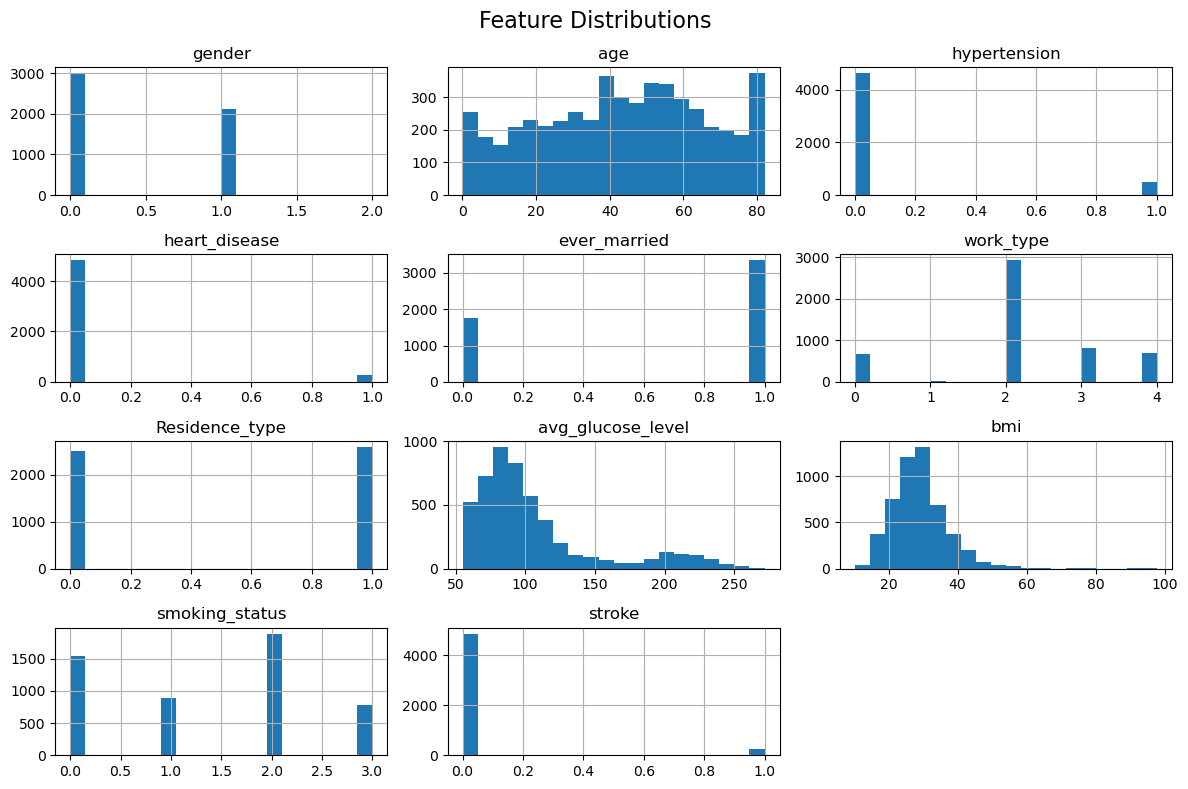

In [ ]:
## Visualize Data Distributions

df.hist(figsize=(12, 8), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


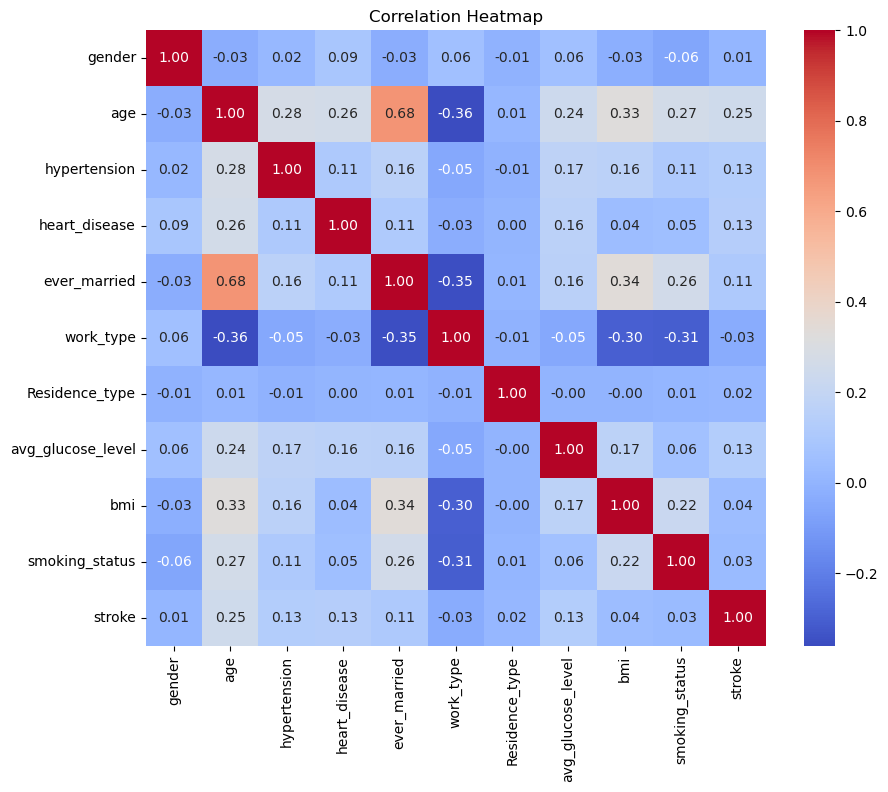

In [10]:
## Correlation Matrix

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


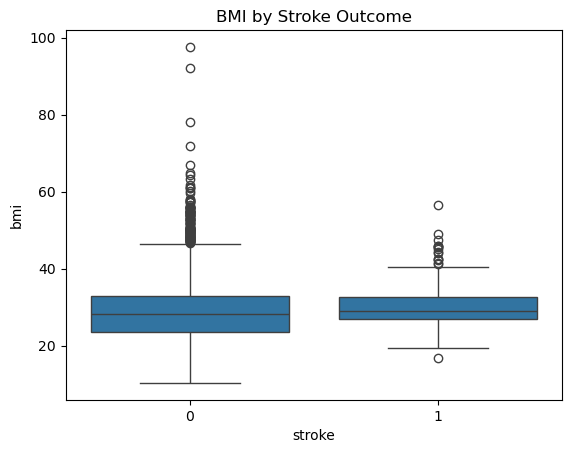

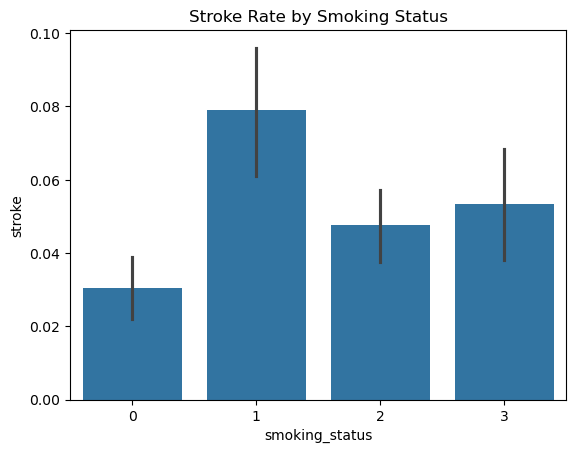

In [ ]:
## Box Plots and bar plots can be added here as needed
# BMI by stroke outcome
sns.boxplot(x='stroke', y='bmi', data=df)
plt.title("BMI by Stroke Outcome")
plt.show()

# Smoking status vs stroke
sns.barplot(x='smoking_status', y='stroke', data=df)
plt.title("Stroke Rate by Smoking Status")
plt.show()


In [12]:
## Save cleaned dataset
df.to_csv(r'C:\Users\drhum\OneDrive\Desktop\Fall 2025\CMSE 830 Foundation for Data Science\Project\cmse830_fds\data\stroke_cleaned.csv', index=False)